In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression

%matplotlib inline 

In [2]:
df = pd.read_csv("part_conditions.csv")

In [3]:
df

,unit_number,cycle_number,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [3]:
results = df.groupby(["unit_number"])["RUL"].max()
# missing on what engine that happens 

In [4]:
print(results.max())

361


In [ ]:
# The most amounts of cycles it took an engine to fail is 361 

In [5]:
print(results.min())

127


In [ ]:
# The fewest amounts of cycles it took an engine to fail is 127

In [6]:
print(results.mean())

205.31


In [ ]:
# The mean amount of cycles it took an engine to fail is 205.31 

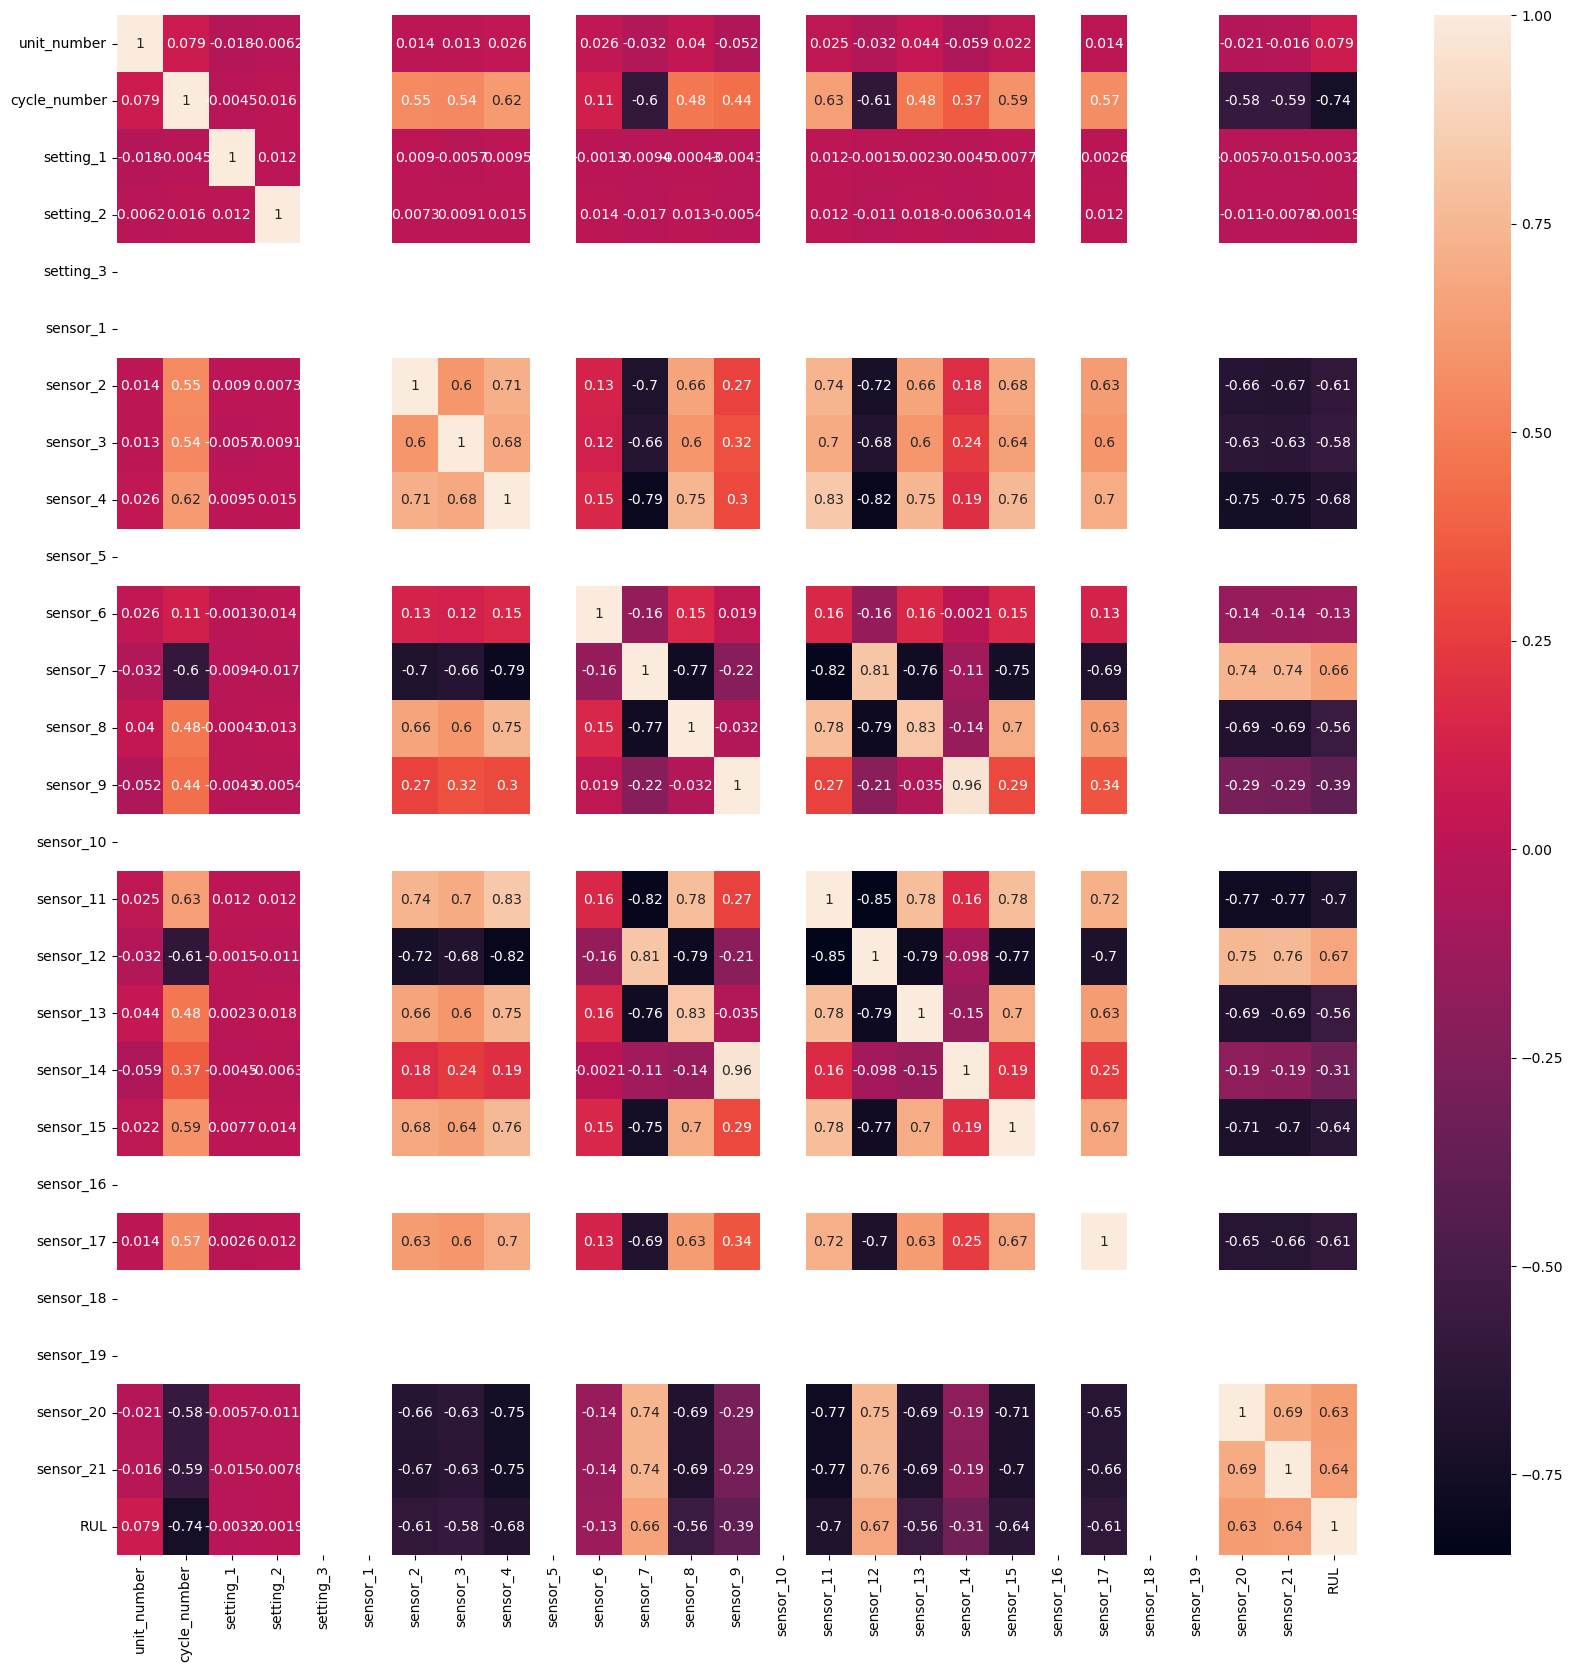

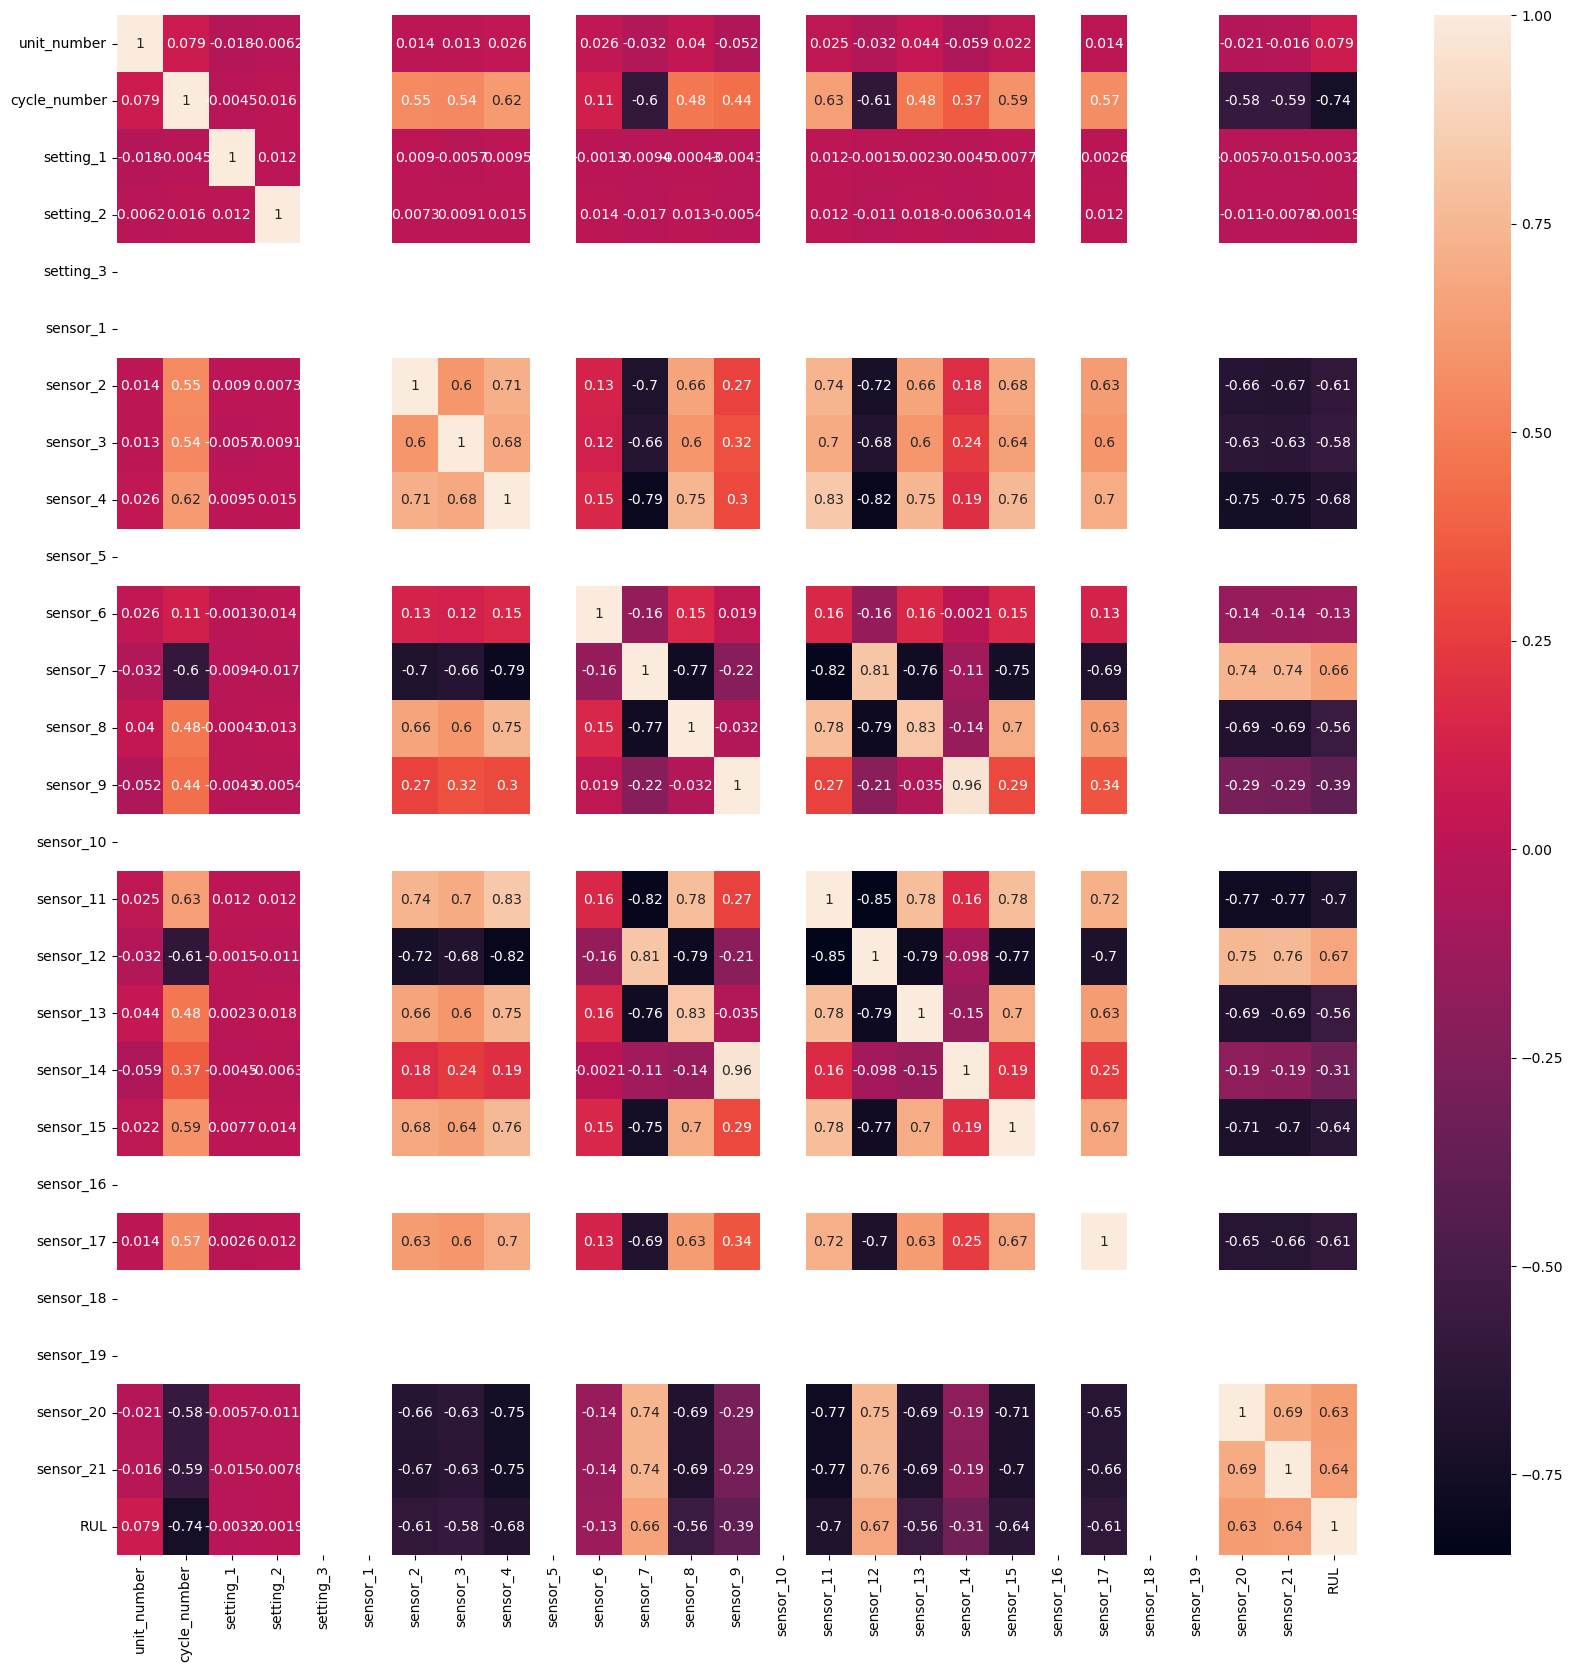

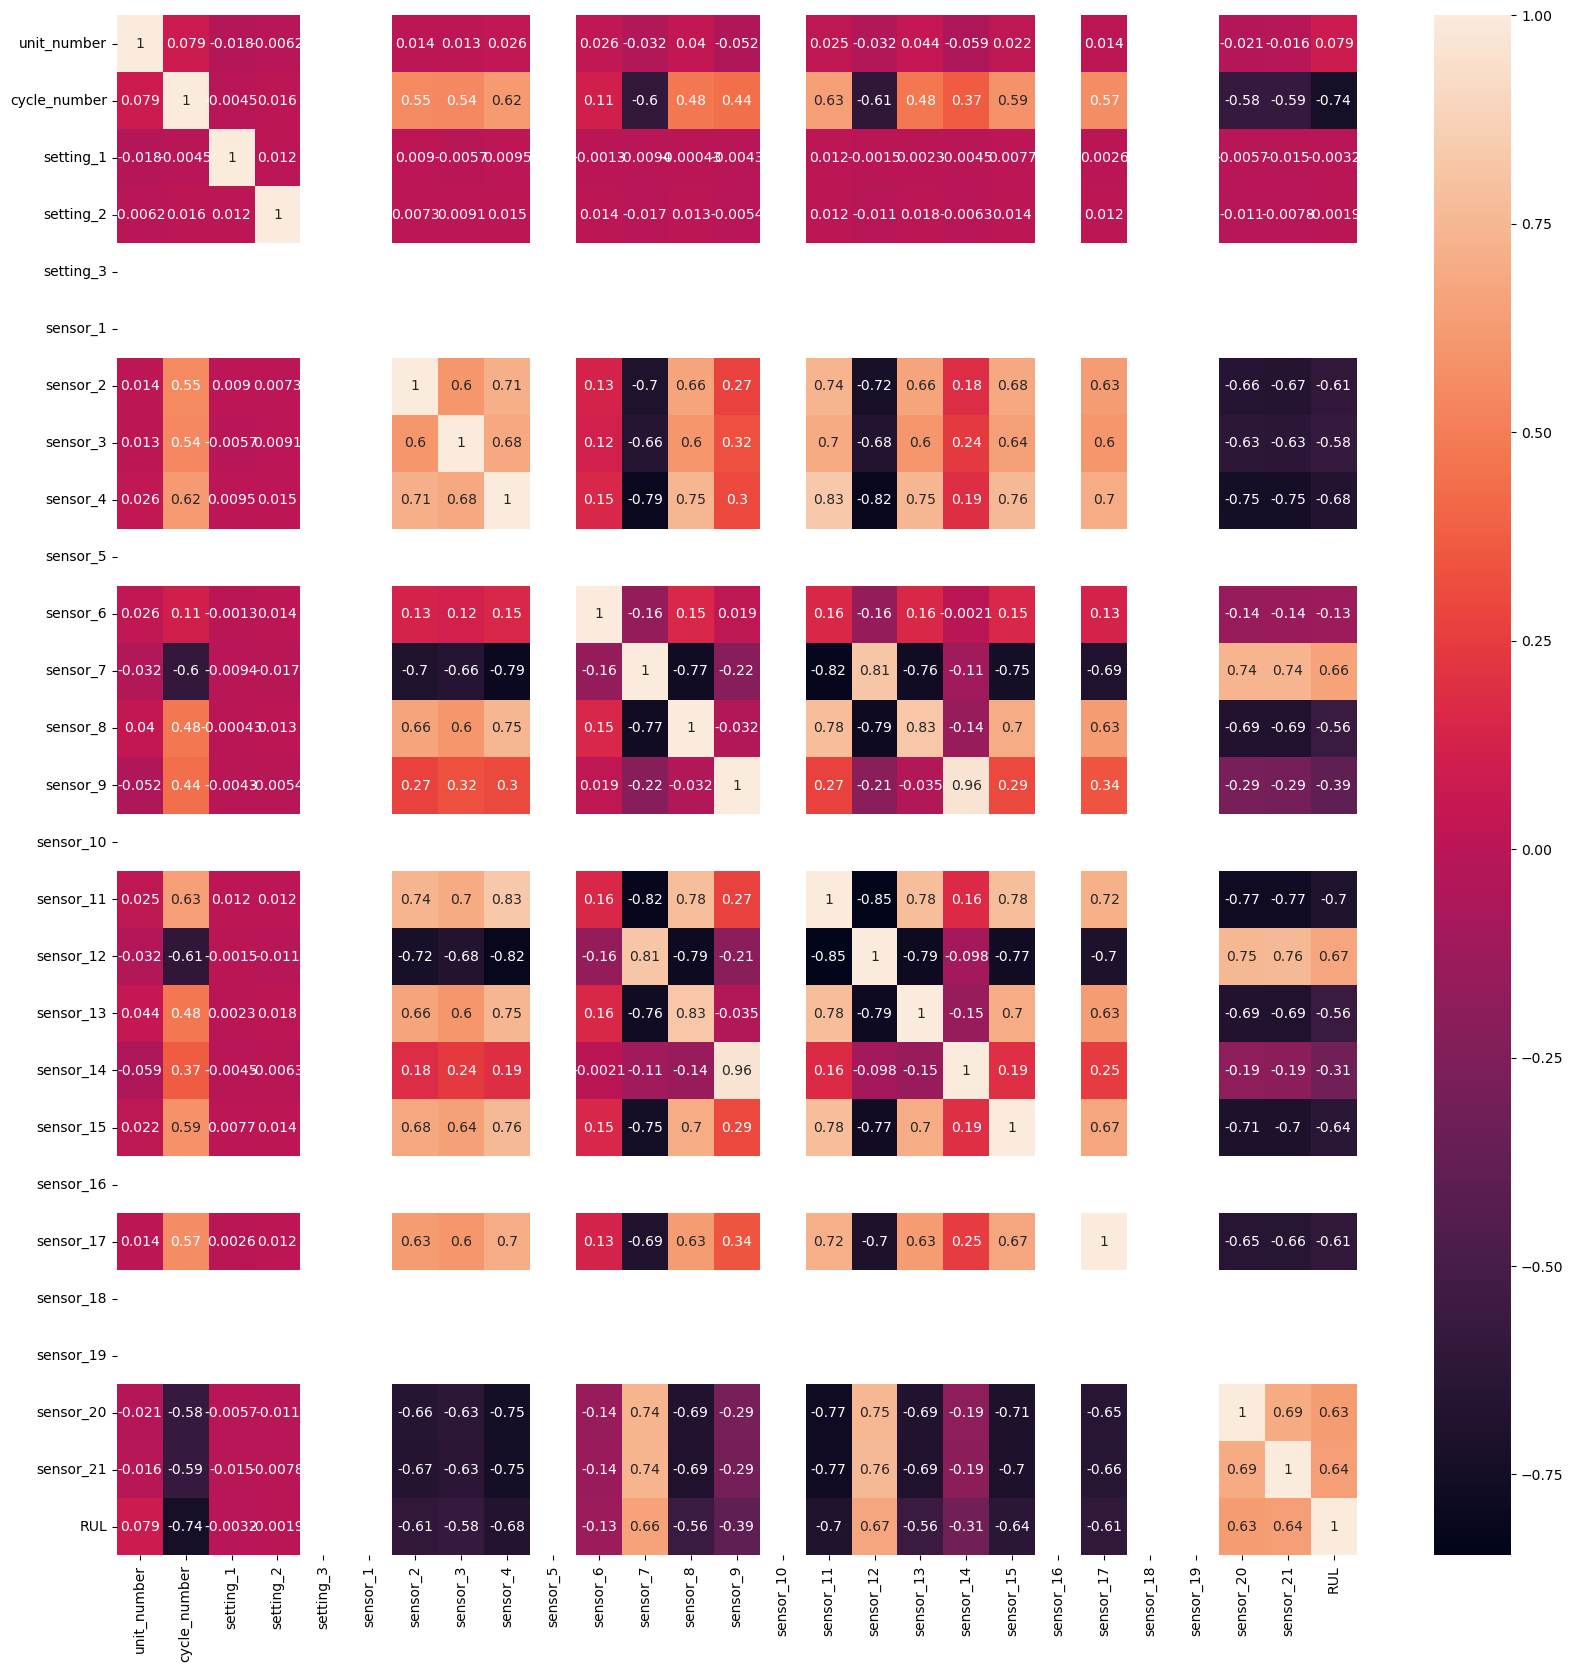

In [15]:
plt.figure(figsize = (20,20))
sns.heatmap(data = df.corr(), annot = True)
plt.show()

In [ ]:
# It looks like sensor 4 and sensor 11 have the highest correlation value to RUL. Both of these sensors however had a negative 
# correlation value. Sensor four has a negative correlation value of -0.68 and sensor 11 has a negative correlation value of -.7.  

# Looking at the correlation table, there are some variables that have a NaN values. These values in the chart like sensor 3, values don't change in the columns. 
# Therefore for the correlation table, when these values try to get calculated for the correlation table, they get NaN values. This could be fixed to get a more clearer correlation table
# by creating a new data set and getting rid of all of the columns that had the same number of values for all values. 

In [8]:
drop_df = df.drop(["setting_3", "sensor_1", "sensor_5","sensor_6", "sensor_10", "sensor_16", "sensor_18", "sensor_19"], axis = 1)

In [ ]:
# I don't believe that this is reasonable because so far in the analysis, you don't know how it will affect the data if you 
# were to get rid of all of these columns. However, if the data wasn't accurate and we considered them to be data that wasn't 
# given to us, then it would make since that the data was no longer of use and it would be reasonable to exculde them from further analysis. 

In [9]:
drop_df

,unit_number,cycle_number,setting_1,setting_2,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [ ]:
# Below is the new data set, with all of the columns dropped that had the same values throughout the data set

In [10]:
x = drop_df.drop(["RUL", "unit_number", "cycle_number"], axis = 1)
y = df["RUL"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train,y_train)
ypred = model.predict(x_test)

In [11]:
print(model.score(x_train, y_train))

0.5769751371430152


In [7]:
print(r2_score(y_test, ypred))

0.5841635494974775


In [ ]:
# Looking at the linear regression predicting score. The score of the model on the training data is .5772.
# The score on the test data is .584. These scores are low scores, which is bad because we don't want low prediction value scores. 
# The reason why I think we got low prediction value scores, could be due to the model making small errors throughout the data set or that the data is too complex 
# to get an accurate reading of the data set. 

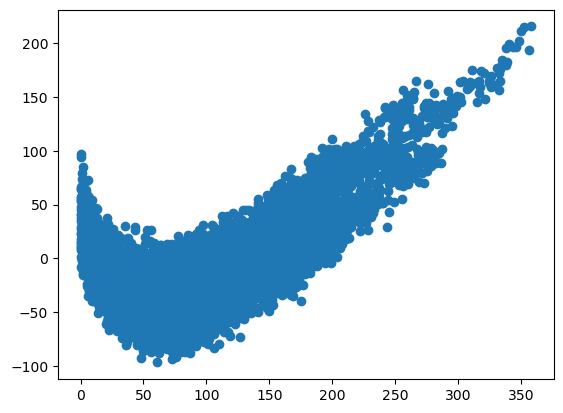

In [35]:
residuals = (y_test - ypred)
plt.scatter(y_test, residuals)

In [11]:
# A residual plot shows the difference between an observed response and the fitted response
# values. What I notice about this residual plot, is that there is a positve trend line towards the end on the 
# data points however, in the beginning of the residual plot there is a bit of a parabolic curve. This could due to the fact
# that some values in the residual plot start of hihger,and as we continue to go futher there the values decrease before they begin to increase again. 

In [ ]:
# I am predicting the RUL value and I am using the sensor inputs as my input value 
# If I was in the real world these models would be used 

In [26]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, max_depth=10)

from sklearn.feature_selection import RFE

In [29]:
rfe = RFE(estimator = LinearRegression(), n_features_to_select = 1)
fit = rfe.fit(x_train, y_train)

print(fit.n_features_)
print(fit.ranking_)

x.columns

1
[15 16  9 13  5  4 14  2  1  3 12  7  6 11  8 10]


Index(['setting_1', 'setting_2', 'sensor_2', 'sensor_3', 'sensor_4',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20',
       'sensor_21'],
      dtype='object')

In [9]:
# Ranking the features in order of their predictive power to RUL
# sensor 20 has the highest predictive power for Rul, then sensor 21, followed by 
# sensor 11. From there sensor 15 is ranked next, sensor 4, sensor 17, setting 2, setting 1, sensor 3
# sensor 14, sensor 8, sensor 7, sensor 13, sensor 9, and finally sensor 12 is ranked last. 

RFE(estimator=RandomForestRegressor(max_depth=10), n_features_to_select=1)

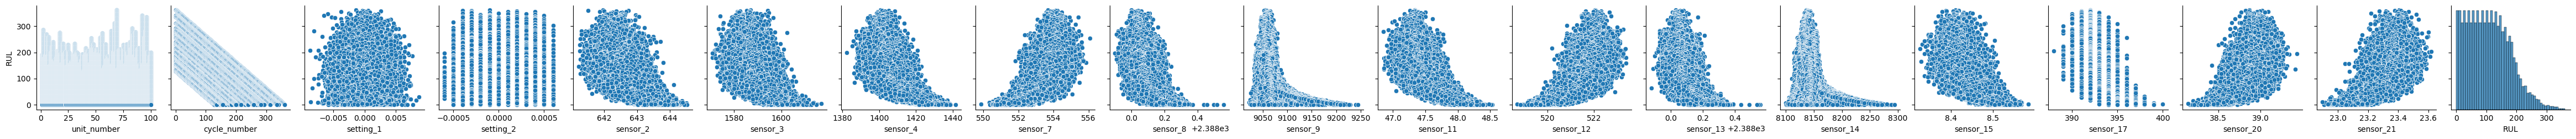

In [41]:
sns.pairplot(data = drop_df, y_vars = ["RUL"])

In [ ]:
# Looking at the pairplot, when only compairng to RUL, we can see the correlation plots 
# and see which feature has the most strongest correlation value to RUL. Besides looking at unit number and
# the feature that has the strongest correlation is sensor 7, has a strong positive correlation, while sensor 4 has a strong negative correlation. 
# THe features that I would consider being one of the lowest feature is sensor 9, sensor 14
# and sensor 1 has the least correlation feature when compared to RUL. 

In [13]:
df2 = pd.read_csv("defects.csv")
df2

,Unnamed: 0,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,fault_type
0,0,42,50,270900,270944,267,17,44,24220,76,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,1,645,651,2538079,2538108,108,10,30,11397,84,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,2,829,835,1553913,1553931,71,8,19,7972,99,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,3,853,860,369370,369415,176,13,45,18996,99,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,4,1289,1306,498078,498335,2409,60,260,246930,37,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,1935,238,287,315114,315142,671,91,39,86424,119,...,0.5385,0.7179,0.0,2.8267,1.6902,1.4472,-0.4286,0.0062,0.9992,Other_Faults
1836,1937,144,175,340581,340598,287,44,24,34599,112,...,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,Other_Faults
1837,1938,145,174,386779,386794,292,40,22,37572,120,...,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,Other_Faults
1838,1939,137,170,422497,422528,419,97,47,52715,117,...,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,Other_Faults


(array([152., 180.,   0., 376.,   0.,  68.,  51.,   0., 385., 628.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

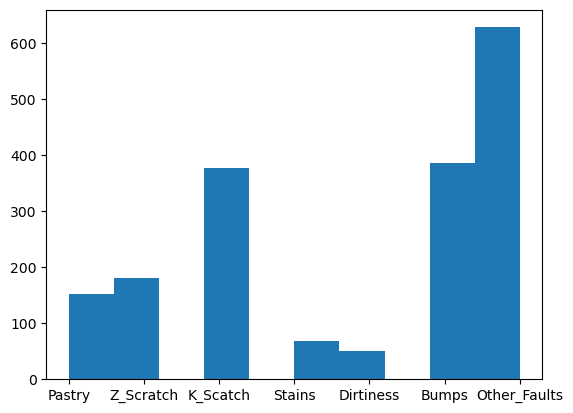

In [48]:
# What is the distribution of faul types?
plt.hist(df2["fault_type"])

In [ ]:
# The distribution of the fault types isn't uniform as the bar graphs there isn't any 
# In conclusion there isn't a lot of distribution for the distribution of fault types.
# There is no normal distribution for the historgram. 

In [14]:
x2 = df2.drop(["Unnamed: 0", "fault_type"], axis = 1)
y2 = df2["fault_type"]

x2_train,x2_test,y2_train,y2_test = train_test_split(x2, y2, test_size = 0.3)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x2_train)
x_test_scaled = scaler.transform(x2_test) 

from sklearn.linear_model import LogisticRegression 

model2 = LogisticRegression()
model2.fit(x_train_scaled, y2_train)

ypred2 = model2.predict(x_test_scaled)

C:\Users\court\Downloads\python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
ypred2

array(['K_Scatch', 'Other_Faults', 'K_Scatch', 'Other_Faults', 'K_Scatch',
       'Dirtiness', 'Bumps', 'Bumps', 'Bumps', 'K_Scatch', 'Other_Faults',
       'Bumps', 'Other_Faults', 'K_Scatch', 'Bumps', 'Bumps', 'Bumps',
       'Bumps', 'Other_Faults', 'K_Scatch', 'Bumps', 'Dirtiness',
       'Other_Faults', 'Other_Faults', 'K_Scatch', 'Other_Faults',
       'Pastry', 'Other_Faults', 'Other_Faults', 'Dirtiness',
       'Other_Faults', 'Z_Scratch', 'Other_Faults', 'Z_Scratch',
       'Other_Faults', 'Bumps', 'Pastry', 'K_Scatch', 'Other_Faults',
       'Other_Faults', 'Bumps', 'Other_Faults', 'Bumps', 'Bumps',
       'Stains', 'Other_Faults', 'Z_Scratch', 'Other_Faults', 'Bumps',
       'K_Scatch', 'K_Scatch', 'Pastry', 'Other_Faults', 'Other_Faults',
       'K_Scatch', 'Z_Scratch', 'Other_Faults', 'Z_Scratch', 'K_Scatch',
       'Bumps', 'Bumps', 'Bumps', 'Pastry', 'K_Scatch', 'Bumps',
       'Z_Scratch', 'Other_Faults', 'Stains', 'Other_Faults',
       'Other_Faults', 'K_Scatch', 'Pas

In [15]:
from sklearn import metrics

cm = metrics.confusion_matrix(y2_test,ypred2)
print(cm)
print("Accuracy: ", metrics.accuracy_score(y2_test, ypred2))

[[ 69   0   0  35   4   1   4]
 [  0  10   0   5   1   0   0]
 [  1   0 106   4   2   0   0]
 [ 27   5  11 114  17   4   9]
 [  3   1   0  12  24   0   3]
 [  1   0   0   0   0  21   0]
 [  2   0   2   4   0   0  50]]
Accuracy:  0.7137681159420289


In [ ]:
# The confusion matix is used to evaluate the performance of a machine learning model
# The confusion matrix shows which values in the prediction tests are misclassified. 
# The one that is the most improperly classified. Looking at the diaganols, the one that is the most 
# improperly classified is the first matricie that only has 61 properly classified measurements and 51 misclassified measurements
# Looking more in depth at the confusion matrix, overall the model does a good job at clasifying the defects correctly. 
# There are a lot of rows where the misclassification is less than 10 missclassifications however, there are some rows where the misclassification is almost as much as 
# the correctly classified values. Therefore this confusion matrix shows that some improvements can be made. 

In [ ]:
# The accuracy of the model is 0.713. 

In [19]:
model3 = LogisticRegression(max_iter = 200)
model3.fit(x_train_scaled, y2_train)

ypred3 = model3.predict(x_test_scaled)

In [20]:
ypred3

array(['Bumps', 'Bumps', 'Other_Faults', 'K_Scatch', 'Bumps',
       'Other_Faults', 'Other_Faults', 'Stains', 'Z_Scratch', 'Z_Scratch',
       'K_Scatch', 'K_Scatch', 'K_Scatch', 'Other_Faults', 'Other_Faults',
       'Bumps', 'K_Scatch', 'Bumps', 'Pastry', 'Other_Faults',
       'Other_Faults', 'Z_Scratch', 'Pastry', 'Pastry', 'Other_Faults',
       'Stains', 'Bumps', 'K_Scatch', 'Bumps', 'Other_Faults', 'Bumps',
       'Pastry', 'Other_Faults', 'Other_Faults', 'Stains', 'Stains',
       'Bumps', 'Other_Faults', 'Bumps', 'Stains', 'K_Scatch', 'K_Scatch',
       'Other_Faults', 'Bumps', 'Other_Faults', 'K_Scatch', 'K_Scatch',
       'Bumps', 'Other_Faults', 'Other_Faults', 'Bumps', 'Other_Faults',
       'Bumps', 'Pastry', 'Other_Faults', 'Other_Faults', 'Other_Faults',
       'K_Scatch', 'Z_Scratch', 'Other_Faults', 'Bumps', 'Other_Faults',
       'Other_Faults', 'Stains', 'Other_Faults', 'Pastry', 'Other_Faults',
       'K_Scatch', 'K_Scatch', 'K_Scatch', 'Pastry', 'Bumps', 'Z_Scrat

In [50]:
print("Accuracy: ", metrics.accuracy_score(y2_test, ypred3))

Accuracy:  0.7137681159420289


In [ ]:
# The Accuracy model for the model does not improve. The value stays the same
# even when the max_iter is included. Max iter helps define the maximum number of iterations that
# are taken in order for the solvers to converge. Having the same accuracy value, could mean that the 
# the data set isn't overfitted. 

In [22]:
model4 = LogisticRegression(max_iter = 5000)
model4.fit(x_train_scaled, y2_train)

ypred4 = model4.predict(x_test_scaled)

In [23]:
ypred4

array(['Bumps', 'Bumps', 'Other_Faults', 'K_Scatch', 'Bumps',
       'Other_Faults', 'Other_Faults', 'Stains', 'Z_Scratch', 'Z_Scratch',
       'K_Scatch', 'K_Scatch', 'K_Scatch', 'Other_Faults', 'Other_Faults',
       'Bumps', 'K_Scatch', 'Bumps', 'Pastry', 'Other_Faults',
       'Other_Faults', 'Z_Scratch', 'Pastry', 'Pastry', 'Other_Faults',
       'Stains', 'Bumps', 'K_Scatch', 'Bumps', 'Other_Faults', 'Bumps',
       'Pastry', 'Other_Faults', 'Other_Faults', 'Stains', 'Stains',
       'Bumps', 'Other_Faults', 'Bumps', 'Stains', 'K_Scatch', 'K_Scatch',
       'Other_Faults', 'Bumps', 'Other_Faults', 'K_Scatch', 'K_Scatch',
       'Bumps', 'Other_Faults', 'Other_Faults', 'Bumps', 'Other_Faults',
       'Bumps', 'Pastry', 'Other_Faults', 'Other_Faults', 'Other_Faults',
       'K_Scatch', 'Z_Scratch', 'Other_Faults', 'Bumps', 'Other_Faults',
       'Other_Faults', 'Stains', 'Other_Faults', 'Pastry', 'Other_Faults',
       'K_Scatch', 'K_Scatch', 'K_Scatch', 'Pastry', 'Bumps', 'Z_Scrat

In [24]:
print("Accuracy: ", metrics.accuracy_score(y2_test, ypred4))

Accuracy:  0.7137681159420289


In [ ]:
# Even when increasing the max_iter value to 5000, the accuracy model stays the same
# with a value of .713. This means that even when we increase the amount of times we run the 
# solution, we still end up with the same accuracy value. This could be due to having very similar data values
# therefore, when we change the max iterations value, and run the program for a longer time a significant change might
# not happen due to the ypred, vlaues being so similar. 

In [36]:
x3 = df2.drop(["Unnamed: 0", "fault_type"], axis = 1)
y3 = df2["fault_type"]

x3_train,x3_test,y3_train,y3_test = train_test_split(x3, y3, test_size = 0.3)

scaler = MinMaxScaler()

x3_train_scaled = scaler.fit_transform(x3_train)
x3_test_scaled = scaler.transform(x3_test)

from sklearn.linear_model import LogisticRegression 

model5 = LogisticRegression()

model5.fit(x3_train_scaled, y3_train)

ypred5 = model5.predict(x3_test_scaled)

C:\Users\court\Downloads\python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
cm2 = metrics.confusion_matrix(y3_test,ypred5)
print(cm2)

[[ 72   0   1  47   0   2   0]
 [  0   8   0   8   1   0   0]
 [  0   0 101  10   0   1   0]
 [ 33   3  10 119   3   0   3]
 [  1   1   1  31  13   2   2]
 [  1   0   0   4   0  15   0]
 [  1   0   2   4   0   0  52]]


In [38]:
print("Accuracy: ", metrics.accuracy_score(y3_test, ypred5))

Accuracy:  0.6884057971014492


In [ ]:
# Comparing this accuracy to part 3, the accuracy decreases by around 0.025.
# This could mean that scaling the data using the MinMaxScaler wont have a positive affect on the data. 
# Even though the difference between the two accuracy values are fairly similar, it still makes a difference that 
# the one accuracy is higher than the other one. Using standard scaler instead of minmaxscaler, could have helped improve the accuracy 
# because the standard scaler scales all its values between min and max so that they fall in a range from min to max, whicle the minmax scaler
# scales the minimum and maximum vales to be 0 and 1 respectively. 
# Therefore, using the MinMaxScaler to scale the data instead of the Standard scaler, some of the testing data are changed to scale more into the range
# of the MinMaxScaler, making the accuracy lower, sense originally a lot of the data doesn't fit right in the data. 

In [49]:
model6 = LogisticRegression(max_iter = 10000,penalty = "l2", C = 0.1)
model6.fit(x3_train_scaled, y3_train)
ypred6 = model6.predict(x3_test_scaled)
print("Accuracy: ", metrics.accuracy_score(y3_test, ypred6))

model7 = LogisticRegression(max_iter = 10000,penalty = "l2", C = 1.0)
model7.fit(x3_train_scaled, y3_train)
ypred7 = model7.predict(x3_test_scaled)
print("Accuracy: ", metrics.accuracy_score(y3_test, ypred7))

model8 = LogisticRegression(max_iter = 10000, penalty = "l2", C = 10)
model8.fit(x3_train_scaled, y3_train)
ypred8 = model8.predict(x3_test_scaled)
print("Accuracy: ", metrics.accuracy_score(y3_test, ypred8))

model9 = LogisticRegression(max_iter = 10000, penalty = "l2" , C= 100) 
model9.fit(x3_train_scaled, y3_train)
ypred9 = model9.predict(x3_test_scaled)
print("Accuracy: ", metrics.accuracy_score(y3_test, ypred9))

model10 = LogisticRegression(max_iter = 10000, penalty = "l2" , C= 1000)
model10.fit(x3_train_scaled, y3_train)
ypred10 = model10.predict(x3_test_scaled)
print("Accuracy: ", metrics.accuracy_score(y3_test, ypred10))

model11 = LogisticRegression(max_iter = 10000, penalty = "l2" , C= 10000)
model11.fit(x3_train_scaled, y3_train)
ypred11 = model11.predict(x3_test_scaled)
print("Accuracy: ", metrics.accuracy_score(y3_test,ypred11))

Accuracy:  0.625
Accuracy:  0.6884057971014492
Accuracy:  0.717391304347826
Accuracy:  0.7192028985507246
Accuracy:  0.7228260869565217
Accuracy:  0.7228260869565217


In [ ]:
# Looking at the results of the accuracy, the optimal value of C is when C is 
# either 1000, and 10,000. These two C values had the same accuracy score of .7228. 
# This could mean that when the C is greater than 100, there would be no change to the accuracy values. 
# Therefore the C value at 1000 is most likely the best result. 

# The biggest thing I noticed is that when the C values increase, the accuracy values also increase. 
# This tells you that when you include regularization in this model, it is best to use a higher C value than a lower one. 
# Also, these results showed an improvement in the scaled data, as the accuracy in one of the final predictions 
# was higher than the accuracy in the very first prediction of this data set. 